In [62]:
import numpy as np
import pandas as pd
import category_encoders as ce                       # converting or encoding the NON-Numneric (or) String attributes
from sklearn.ensemble import RandomForestRegressor   # training and predicting class
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.impute import SimpleImputer             # for missing values
from sklearn.metrics import *                        # accuracy calculation


In [63]:
data_crops = pd.read_csv("apy.csv")
data_crops
states_data = data_crops.State_Name.unique()
print(states_data)
print(data_crops.Season.unique())

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']


In [64]:
print(len(data_crops['State_Name'].unique()))  
print(len(data_crops['District_Name'].unique()))
print(len(data_crops['Season'].unique()))
print(len(data_crops['Crop'].unique()))

33
646
6
124


In [65]:
rainfall_data = pd.read_csv("rainfall.csv")
print(rainfall_data)
print(rainfall_data.SUBDIVISION.unique())

                    SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN  \
0     ANDAMAN & NICOBAR ISLANDS  1901  49.2   87.1  29.2    2.3  528.8  517.5   
1     ANDAMAN & NICOBAR ISLANDS  1902   0.0  159.8  12.2    0.0  446.1  537.1   
2     ANDAMAN & NICOBAR ISLANDS  1903  12.7  144.0   0.0    1.0  235.1  479.9   
3     ANDAMAN & NICOBAR ISLANDS  1904   9.4   14.7   0.0  202.4  304.5  495.1   
4     ANDAMAN & NICOBAR ISLANDS  1905   1.3    0.0   3.3   26.9  279.5  628.7   
...                         ...   ...   ...    ...   ...    ...    ...    ...   
4111                LAKSHADWEEP  2011   5.1    2.8   3.1   85.9  107.2  153.6   
4112                LAKSHADWEEP  2012  19.2    0.1   1.6   76.8   21.2  327.0   
4113                LAKSHADWEEP  2013  26.2   34.4  37.5    5.3   88.3  426.2   
4114                LAKSHADWEEP  2014  53.2   16.1   4.4   14.9   57.4  244.1   
4115                LAKSHADWEEP  2015   2.2    0.5   3.7   87.1  133.1  296.6   

        JUL    AUG    SEP  

In [66]:
# state names are not exact as in the apy.csv dataset
states = rainfall_data.SUBDIVISION.unique()
found = []
not_found_states = []
for state in states_data:
    if state.upper() not in states:
        not_found_states.append(state)
    else:
        found.append(state)
        
print(not_found_states)
print(len(found))

['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Assam', 'Chandigarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat', 'Haryana', 'Jammu and Kashmir ', 'Karnataka', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Rajasthan', 'Sikkim', 'Telangana ', 'Tripura', 'Uttar Pradesh', 'West Bengal']
9


In [67]:
# changing few strings for easy matching

rainfall_data["SUBDIVISION"] = rainfall_data["SUBDIVISION"].replace("ANDAMAN & NICOBAR ISLANDS","Andaman and Nicobar Islands")
rainfall_data["SUBDIVISION"] = rainfall_data["SUBDIVISION"].replace("GUJARAT REGION","Gujarat")
rainfall_data["SUBDIVISION"] = rainfall_data["SUBDIVISION"].replace("JAMMU & KASHMIR","Jammu and Kashmir")


In [68]:
'''Definign a function to make the rainfall data appropriate with complete STATE NAME
     example: Karnataka = Coastal_karnataka + North karnataka + south Karnataka.
              Uttar Pradesh = East Uttar pradesh + West uttar pradesh'''

def getting_values(states_information):
    state_value = []
    result = []
    for state in states_information:
        temp = rainfall_data.loc[rainfall_data["SUBDIVISION"] == state]
        state_value.append(temp)
    for i in range(0,len(state_value)):
        state_value[i] = state_value[i].drop(["SUBDIVISION"],axis='columns')
        #working fine
    for i in range(0,len(state_value)):
        state_value[i] = state_value[i].reset_index(drop=True)
        #working fine
    years = state_value[0]["YEAR"]
    
    if(len(state_value)==2):
        result = state_value[0].add(state_value[1],fill_value=None)
    elif(len(state_value)==3):    
        temp1  = state_value[0].add(state_value[1],fill_value=None)
        result = temp1.add(state_value[2],fill_value=None)
    elif(len(state_value)==4):
        temp1 = state_value[0].add(state_value[1],fill_value=None)
        temp2 = temp1.add(state_value[2],fill_value=None)
        result = temp2.add(state_value[3],fill_value=None)
    
    result = result.drop(["YEAR"],axis='columns')
    result.insert(0,"YEAR",years)
    return result

# UTTAR PRADESH
states_up = ['EAST UTTAR PRADESH','WEST UTTAR PRADESH']
uttar_pradesh = getting_values(states_up)
uttar_pradesh.insert(0,"SUBDIVISION","Uttar Pradesh")
print("UTTAR PRADESH\n\n")
print(uttar_pradesh)


UTTAR PRADESH


       SUBDIVISION  YEAR    JAN    FEB    MAR   APR   MAY    JUN    JUL  \
0    Uttar Pradesh  1901  114.0   56.9   17.7   1.8  19.2   45.6  428.4   
1    Uttar Pradesh  1902   10.7    6.9    3.0   6.8  28.6   87.0  737.4   
2    Uttar Pradesh  1903   21.6    0.8    2.5   0.7  23.5  104.3  260.7   
3    Uttar Pradesh  1904   13.6    3.5   38.0   0.8  53.5  216.5  718.2   
4    Uttar Pradesh  1905   49.1   50.2   34.8   9.0  22.5   36.2  442.2   
..             ...   ...    ...    ...    ...   ...   ...    ...    ...   
110  Uttar Pradesh  2011    3.1   13.1    5.5   5.7  61.8  339.7  413.8   
111  Uttar Pradesh  2012   34.8    1.3    4.8   7.5   0.5   22.5  379.3   
112  Uttar Pradesh  2013   26.5  129.1    6.2  10.3   3.2  500.3  463.9   
113  Uttar Pradesh  2014   95.7   55.2   38.0   7.0  21.7   69.8  376.1   
114  Uttar Pradesh  2015   61.6   11.3  115.0  44.2  16.7  167.3  373.2   

       AUG    SEP    OCT   NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  \
0    659

In [69]:
# KARNATAKA
states_karnataka = ['COASTAL KARNATAKA','NORTH INTERIOR KARNATAKA','SOUTH INTERIOR KARNATAKA']
karnataka  = getting_values(states_karnataka)
karnataka.insert(0,"SUBDIVISION","Karnataka")
print("KARNATAKA\n\n")
print(karnataka)



KARNATAKA


    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0     Karnataka  1901  10.2  51.2  20.8  152.3  256.7  1187.4  1353.1   830.7   
1     Karnataka  1902   5.1   0.8  11.9   75.3  186.7   901.4  1694.8   614.4   
2     Karnataka  1903   4.5   0.0   1.2   22.6  381.3   769.0  1899.3   895.9   
3     Karnataka  1904   3.6   0.8  18.5   78.2  284.2  1396.7  1358.7   587.3   
4     Karnataka  1905   1.7  14.1  16.8   46.0  252.9   962.8   985.8   866.7   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
110   Karnataka  2011   7.4  23.4  28.3  187.5  179.6  1296.8  1433.7  1212.8   
111   Karnataka  2012   NaN  23.1  13.6  211.4   88.0   792.7  1013.8  1369.6   
112   Karnataka  2013   4.1  35.8  33.7   88.5  243.4  1428.6  1983.4   905.8   
113   Karnataka  2014   0.4   8.8  48.8  113.6  405.4   664.2  1563.8  1580.8   
114   Karnataka  2015   5.5   1.2  84.2  203.5  320.9  1043.6  1081.4   790.2   

       SEP    O

In [70]:
# ANDHRA PRADESH
states_andhra = ['COASTAL ANDHRA PRADESH','RAYALSEEMA']
andhra_pradesh = getting_values(states_andhra)
andhra_pradesh.insert(0,"SUBDIVISION","Andhra Pradesh")
print("ANDHRA PRADESH \n\n")
print(andhra_pradesh)
            
            

ANDHRA PRADESH 


        SUBDIVISION  YEAR   JAN    FEB   MAR    APR    MAY    JUN    JUL  \
0    Andhra Pradesh  1901  25.8  131.1   7.2   40.8  107.6  130.7  186.4   
1    Andhra Pradesh  1902  12.0    0.2   4.5   34.9   74.4  146.2  185.8   
2    Andhra Pradesh  1903  30.8   13.4   0.2    9.8  153.9  221.5  376.1   
3    Andhra Pradesh  1904  16.1    0.0   7.1   10.1  195.1  147.6  195.3   
4    Andhra Pradesh  1905   7.6   23.5  85.0   55.3  113.0  150.5  115.5   
..              ...   ...   ...    ...   ...    ...    ...    ...    ...   
110  Andhra Pradesh  2011   0.8   30.0   0.9   96.9  100.9  131.3  324.9   
111  Andhra Pradesh  2012  40.3    0.0   5.2   56.7   78.1  142.4  361.6   
112  Andhra Pradesh  2013   3.3   60.2  11.7   74.8   67.1  201.3  258.1   
113  Andhra Pradesh  2014   0.6    1.9  21.6   11.1  159.6  112.0  220.5   
114  Andhra Pradesh  2015   3.9    0.6  18.9  105.7   73.8  356.8  159.1   

       AUG    SEP    OCT    NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-

In [71]:
# RAJASTHAN
states_rajasthan = ['WEST RAJASTHAN','EAST RAJASTHAN']
rajasthan = getting_values(states_rajasthan)
rajasthan.insert(0,"SUBDIVISION","Rajasthan")
print("RAJASTHAN\n\n")
print(rajasthan)

RAJASTHAN


    SUBDIVISION  YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG  \
0     Rajasthan  1901  28.3   8.9   4.0   0.7  11.1   18.0  243.8  234.8   
1     Rajasthan  1902   4.1   0.7   0.0   2.3  13.9   83.7  274.6  188.0   
2     Rajasthan  1903   3.6   2.0   6.8   0.1  17.1   18.3  393.0  316.2   
3     Rajasthan  1904   8.1   8.4  38.0   0.9  38.9   64.5  329.5  269.1   
4     Rajasthan  1905  10.4  13.6   3.9   2.9   2.3   19.3  160.6   31.5   
..          ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   
110   Rajasthan  2011   0.0  23.0   1.7   2.0  12.9  165.3  282.1  450.9   
111   Rajasthan  2012   2.4   0.0   0.0  13.1  19.9   16.5  210.9  531.7   
112   Rajasthan  2013  10.0  43.5   4.6   6.3   2.7  128.2  423.5  416.7   
113   Rajasthan  2014  29.2  12.2  11.1  15.7  31.4   37.3  291.4  330.6   
114   Rajasthan  2015  13.5   1.0  86.2  41.1  19.0  149.6  532.2  203.3   

       SEP   OCT  NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  Oct-Dec  
0

In [72]:
# MADHYA PRADESH
states_mp = ['WEST MADHYA PRADESH','EAST MADHYA PRADESH']
madhya_pradesh = getting_values(states_mp)
madhya_pradesh.insert(0,"SUBDIVISION","Madhya Pradesh")
print("MADHYA PRADESH\n\n")
print(madhya_pradesh)

MADHYA PRADESH


        SUBDIVISION  YEAR   JAN   FEB    MAR   APR   MAY    JUN    JUL    AUG  \
0    Madhya Pradesh  1901  74.3  43.9   21.5  13.5   8.3  102.2  596.4  939.1   
1    Madhya Pradesh  1902  37.0  17.3    0.0   5.6   8.6   63.9  813.8  406.4   
2    Madhya Pradesh  1903  10.9   2.9    0.3   0.9  59.8  118.1  566.3  627.8   
3    Madhya Pradesh  1904   5.2  30.8   63.0   0.0  20.6  206.5  716.2  535.2   
4    Madhya Pradesh  1905  19.4  12.4   15.4  13.1  13.2   70.5  618.7  380.9   
..              ...   ...   ...   ...    ...   ...   ...    ...    ...    ...   
110  Madhya Pradesh  2011   0.6   3.6    0.4   8.9   8.3  574.0  630.3  670.2   
111  Madhya Pradesh  2012  45.6   0.7    0.6   2.0   4.3  116.0  838.1  692.9   
112  Madhya Pradesh  2013   3.7  74.5   22.6  12.3   0.7  575.6  941.3  913.4   
113  Madhya Pradesh  2014  57.7  84.1   22.4   6.5   3.9  122.4  620.8  442.8   
114  Madhya Pradesh  2015  77.5  17.4  126.9  39.1   8.3  293.3  690.4  548.7   

       SEP

In [73]:
# MAHARASTRA
states_maharastra = ['MATATHWADA','MADHYA MAHARASHTRA','VIDARBHA','KONKAN & GOA']
maharastra = getting_values(states_maharastra)
maharastra.insert(0,"SUBDIVISION","Maharastra")
print("MAHARASTRA\n\n")
print(maharastra)

MAHARASTRA


    SUBDIVISION  YEAR   JAN   FEB    MAR    APR    MAY     JUN     JUL  \
0    Maharastra  1901  77.0  43.9   71.1  146.9   84.1  1176.6  1770.8   
1    Maharastra  1902  11.0   0.1    0.5   19.1   22.3   621.2  1546.1   
2    Maharastra  1903  15.4   4.8    0.2    7.4  374.4   782.4  2320.1   
3    Maharastra  1904   4.7   8.1   33.3    9.8   45.3  1318.5  1174.9   
4    Maharastra  1905   8.7  16.0   12.4   25.5   51.0   524.3  1372.7   
..          ...   ...   ...   ...    ...    ...    ...     ...     ...   
110  Maharastra  2011   0.0   5.3    1.1   19.6    7.7  1207.4  2122.7   
111  Maharastra  2012   3.1   0.1    0.0    4.8    5.0   898.6  1663.1   
112  Maharastra  2013  10.0  33.1    7.3   16.5   31.4  1768.3  2619.2   
113  Maharastra  2014   7.0  43.2  154.8   22.7   62.1   375.9  2013.7   
114  Maharastra  2015  40.5   7.1  176.3   80.9   60.8  1313.9   802.8   

        AUG     SEP    OCT    NOV    DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  \
0    1560.7   398.5

In [74]:
# WEST BENGAL
states_bengal = ['SUB HIMALAYAN WEST BENGAL & SIKKIM','GANGETIC WEST BENGAL']
west_bengal = getting_values(states_bengal)
west_bengal.insert(0,"SUBDIVISION","West Bengal")
print("WEST BENGAL \n\n")
print(west_bengal)

WEST BENGAL 


     SUBDIVISION  YEAR   JAN   FEB    MAR    APR    MAY    JUN     JUL  \
0    West Bengal  1901  63.6  73.2   18.0   93.3  317.2  686.4   805.6   
1    West Bengal  1902   1.2   1.9  131.3  229.9  432.9  680.1  1018.8   
2    West Bengal  1903  23.0  33.3   56.9   49.2  242.1  742.9   611.1   
3    West Bengal  1904   3.5  53.1   36.5  141.8  493.8  560.9   935.7   
4    West Bengal  1905  42.9  80.8  136.6  189.3  447.4  595.7  1048.6   
..           ...   ...   ...   ...    ...    ...    ...    ...     ...   
110  West Bengal  2011  11.0  22.6  111.7  210.0  380.4  854.3   832.2   
111  West Bengal  2012  56.0  29.2   49.9  217.5  246.6  750.8   999.5   
112  West Bengal  2013   5.5  33.6   36.9  160.3  492.4  638.3   851.6   
113  West Bengal  2014   1.1  68.8   57.6   49.8  433.0  736.8   683.3   
114  West Bengal  2015  28.6  20.5   84.1  237.7  362.2  755.4  1026.4   

        AUG     SEP    OCT    NOV   DEC  ANNUAL  Jan-Feb  Mar-May  Jun-Sep  \
0     776.8   556.

In [79]:
'''GIVING INDIVIDUAL STATUS TO THE STATES FROM THE COMBINED VALUES
   LIKE....ASSAM & MEGHALAYA ->  SEPARATE THEM AS ASSAM AND MEGAHALAYA - 2 SEPARATE VALUES(THOUGH SAME)'''
# ASSAM
assam = rainfall_data.loc[rainfall_data["SUBDIVISION"] == "ASSAM & MEGHALAYA"]
assam["SUBDIVISION"] = assam["SUBDIVISION"].replace("ASSAM & MEGHALAYA","Assam")
print(assam)

# NAGALAND
nagaland = rainfall_data.loc[rainfall_data["SUBDIVISION"] == "NAGA MANI MIZO TRIPURA"]
nagaland["SUBDIVISION"] = nagaland["SUBDIVISION"].replace("NAGA MANI MIZO TRIPURA","Nagaland")
print(nagaland)

# MANIPUR
manipur = rainfall_data.loc[rainfall_data["SUBDIVISION"] == "NAGA MANI MIZO TRIPURA"]
manipur["SUBDIVISION"] = manipur["SUBDIVISION"].replace("NAGA MANI MIZO TRIPURA","Manipur")
print(manipur)

# MIZORAM
mizoram = rainfall_data.loc[rainfall_data["SUBDIVISION"] == "NAGA MANI MIZO TRIPURA"]
mizoram["SUBDIVISION"] = mizoram["SUBDIVISION"].replace("NAGA MANI MIZO TRIPURA","Mizoram")
print(mizoram)

# HARYANA
haryana = rainfall_data.loc[rainfall_data["SUBDIVISION"] == "HARYANA DELHI & CHANDIGARH"]
haryana["SUBDIVISION"] = haryana["SUBDIVISION"].replace("HARYANA DELHI & CHANDIGARH","Haryana")
print(haryana)

# DELHI
delhi = rainfall_data.loc[rainfall_data["SUBDIVISION"] == "HARYANA DELHI & CHANDIGARH"]
delhi["SUBDIVISION"] = delhi["SUBDIVISION"].replace("HARYANA DELHI & CHANDIGARH","Delhi")
print(delhi)




    SUBDIVISION  YEAR   JAN   FEB    MAR    APR    MAY    JUN    JUL    AUG  \
207       Assam  1901  27.1  19.5   30.6  223.0  207.0  524.9  430.6  464.1   
208       Assam  1902   9.3  10.2  105.6  350.0  262.1  620.7  510.8  536.0   
209       Assam  1903  19.9  25.4  103.6  140.6  206.6  607.4  362.7  551.9   
210       Assam  1904  11.1  56.1   51.9  457.1  375.2  385.7  477.6  438.8   
211       Assam  1905  19.9  16.9  137.9  213.0  275.5  521.7  439.1  649.1   
..          ...   ...   ...   ...    ...    ...    ...    ...    ...    ...   
317       Assam  2011  11.1  11.4  109.0   92.1  238.3  316.0  395.8  302.6   
318       Assam  2012  15.2   6.9   28.8  279.1  185.8  729.7  444.3  289.2   
319       Assam  2013   1.1   9.6   44.0  112.8  346.7  286.2  367.8  289.7   
320       Assam  2014   2.0  28.3   29.3   51.5  351.1  426.4  374.4  484.6   
321       Assam  2015  13.4  15.5   37.5  250.9  332.5  558.5  300.1  590.9   

       SEP    OCT    NOV   DEC  ANNUAL  Jan-Feb  Ma

/Users/mohankalyanveeraghanta/Software-Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/mohankalyanveeraghanta/Software-Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/mohankalyanveeraghanta/Software-Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarn

In [76]:
rainfall_data.append(uttar_pradesh,ignore_index=True)
print(rainfall_data.SUBDIVISION.unique())

['Andaman and Nicobar Islands' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'Jammu and Kashmir' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'Gujarat'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']


In [77]:
# RABI MONTHS   : JULY to OCTOBER
# KHARIF MONTHS : OCTOBER to MARCH
# SUMMER MONTHS : APRIL TO JUNE
# WHOLE YEAR    : ALL 
# WINTER MONTHS : OCTOBER TO JANUARY
# AUTUMN MONTHS : SEPTEMBER TO NOVEMBER
# TO CREATE A DATAFRAME WITH THESE SEASONS AS COLUMNS
rabi_months = ["JUL","AUG","SEP","OCT"]
rabi_rainfall = [0]
for month in rabi_months:
    rabi_rainfall = rabi_rainfall + rainfall_data[month]
    
print(rabi_rainfall)

kharif_months = ["OCT","NOV","DEC","JAN","FEB","MAR"]

0       1567.3
1       1846.0
2       1575.3
3       1704.7
4       1256.9
         ...  
4111     976.8
4112     938.4
4113     703.6
4114     883.6
4115     729.7
Length: 4116, dtype: float64


In [71]:
print(data_crops.Crop.unique())

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'


In [72]:
#NO missing values in Crops attribute
print(data_crops.Crop.isnull().sum())

print(sum(data_crops.Crop.value_counts()))

0
246091


In [73]:
#defining dictionaries for different types of crops 


cereals = ["Rice","Wheat","bread wheat","Korra","Durum wheat","macaroni wheat","Corn","Maize","Jobs Tears","salay","adlay",
           "tigbe","pawas","Barley","Millet","Oat","Rye","Spelt","Canary grass","Quinoa","Amaranth","Grain amaranth",
           "Buckwheat","Kañiwa","Pitseed goosefoot","Jowar","Small millets","Other Cereals & Millets","Bajra",
          "Ragi","Varagu","Paddy"]

pulses = ["Urad","Greengram","Cowpea(Lobia)","Soyabean","Arhar/Tur","Horse-gram","Bengalgram","Sword bean","Lab-Lab",
         "Field lab lab","dry beans", "dry broad beans","dry peas","chickpeas","cow peas","pigeon peas",
          "Bambara beans","vetches","lupins","pulses nes","other misc. pulses","Pulses total","Moong(Green Gram)",
          "Masoor","Other  Rabi pulses","Peas & beans (Pulses)","Gram","Blackgram","Khesari","Moth","Total foodgrain",
         "Lentil","Bean","Rajmash Kholar","Ricebean (nagadal)","Moong","Other Kharif pulses","Samai"]

fruits = ["Mango","Grapes","Apple","Apricots","Orange","Avocados","Guava","Litchi","Papaya","Sapota",
          "Citrus Fruit","Banana","Pome Granet","Pome Fruit","Pineapple","Jack Fruit",
         "Other Citrus Fruit","Water Melon","Peach","Pear","Other Dry Fruit","Plums","Ber","Other Fresh Fruits"]

vegetables = ["Sweet potato","Dry ginger","Onion","Potato","Bhindi","Beans & Mutter(Vegetable)","Peas(vegetable)",
             "Other Vegetables","Cabbage","Bottle Gourd","Garlic","Ginger","Carrot","Redish","Bitter Gourd","Drum Stick",
             "Snak Guard","Pump Kin","Cauliflower","Beet Root","Ash Gourd","Ribed Guard","Yam","Tapioca","Peas  (vegetable)",
             "Brinjal","Cucumber","Tomato","Lemon","Turnip","Colocosia","Peas"]

nuts = ["Coconut","Cashewnut","Cashewnut Processed","Arcanut (Processed)","Atcanut (Raw)","Cashewnut Raw","Arecanut",
       "Groundnut",]

cashcrops = ["Jute & mesta","Sugarcane","other oilseeds","Cotton(lint)","Sunflower","Castor seed","Tobacco","Sesamum",
             "Linseed","Safflower","other fibres","Mesta","Niger seed","Sannhamp","Oilseeds total",
            "Jute","Guar seed","Rubber","Tea","Coffee","Kapas","Perilla","Jobster"]

spices = ["Black pepper","Dry chillies","Coriander","Cond-spcs other","Turmeric","Rapeseed &Mustard","Cardamom"]



In [74]:

crop_type = []
not_found = []
count_not_found = 0
count_cereals,count_pulses,count_fruits,count_vegetables,count_nuts,count_cashcrops,count_spices = 0,0,0,0,0,0,0
for crop in data_crops.Crop:
    crop = crop.strip()
    if crop in cereals:
        count_cereals += 1
        crop_type.append("Cereal")
    elif crop in pulses:
        count_pulses +=1
        crop_type.append("Pulse")
    elif crop in fruits:
        count_fruits +=1
        crop_type.append("Fruit")
    elif crop in vegetables:
        count_vegetables +=1
        crop_type.append("Vegetable")
    elif crop in nuts:
        count_nuts +=1
        crop_type.append("Nut")
    elif crop in cashcrops:
        count_cashcrops +=1
        crop_type.append("Cash-crop")
    elif crop in spices:
        count_spices +=1
        crop_type.append("Spice")
    else:
        count_not_found +=1
        not_found.append(crop)
        
        
print(f"Number of Cereal crops     : {count_cereals}")
print(f"Number of Pulse crops      : {count_pulses}")
print(f"Number of Fruit crops      : {count_fruits}")
print(f"Number of Vegetables crops : {count_vegetables}")
print(f"Number of Nut crops        : {count_nuts}")
print(f"Number of Cash crops       : {count_cashcrops}")
print(f"Number of Spice crops      : {count_spices}")

#data_crops["Crop Type"] = crop_type
print(len(crop_type))

crop_count = [count_cereals,count_pulses,count_fruits,count_vegetables,count_nuts,count_cashcrops,count_spices]
crops = ["Cereals","Pulses","Fruits","Vegetables","Nuts","Cash Crops","Spices"]
print(crop_count)
print(crops)
print(sum(crop_count))
print(count_not_found)
print(not_found)

Number of Cereal crops     : 63729
Number of Pulse crops      : 61489
Number of Fruit crops      : 6205
Number of Vegetables crops : 28978
Number of Nut crops        : 13573
Number of Cash crops       : 49086
Number of Spice crops      : 23031
246091
[63729, 61489, 6205, 28978, 13573, 49086, 23031]
['Cereals', 'Pulses', 'Fruits', 'Vegetables', 'Nuts', 'Cash Crops', 'Spices']
246091
0
[]


In [75]:
data_crops["Crop_Type"] = crop_type
print(data_crops)

                         State_Name District_Name  Crop_Year       Season  \
0       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2       Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4       Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
...                             ...           ...        ...          ...   
246086                  West Bengal       PURULIA       2014  Summer        
246087                  West Bengal       PURULIA       2014  Summer        
246088                  West Bengal       PURULIA       2014  Whole Year    
246089                  West Bengal       PURULIA       2014  Winter        
246090                  West Bengal       PURULIA       2014  Winter        

                       Crop      Area  Production  Crop_Type  
0           

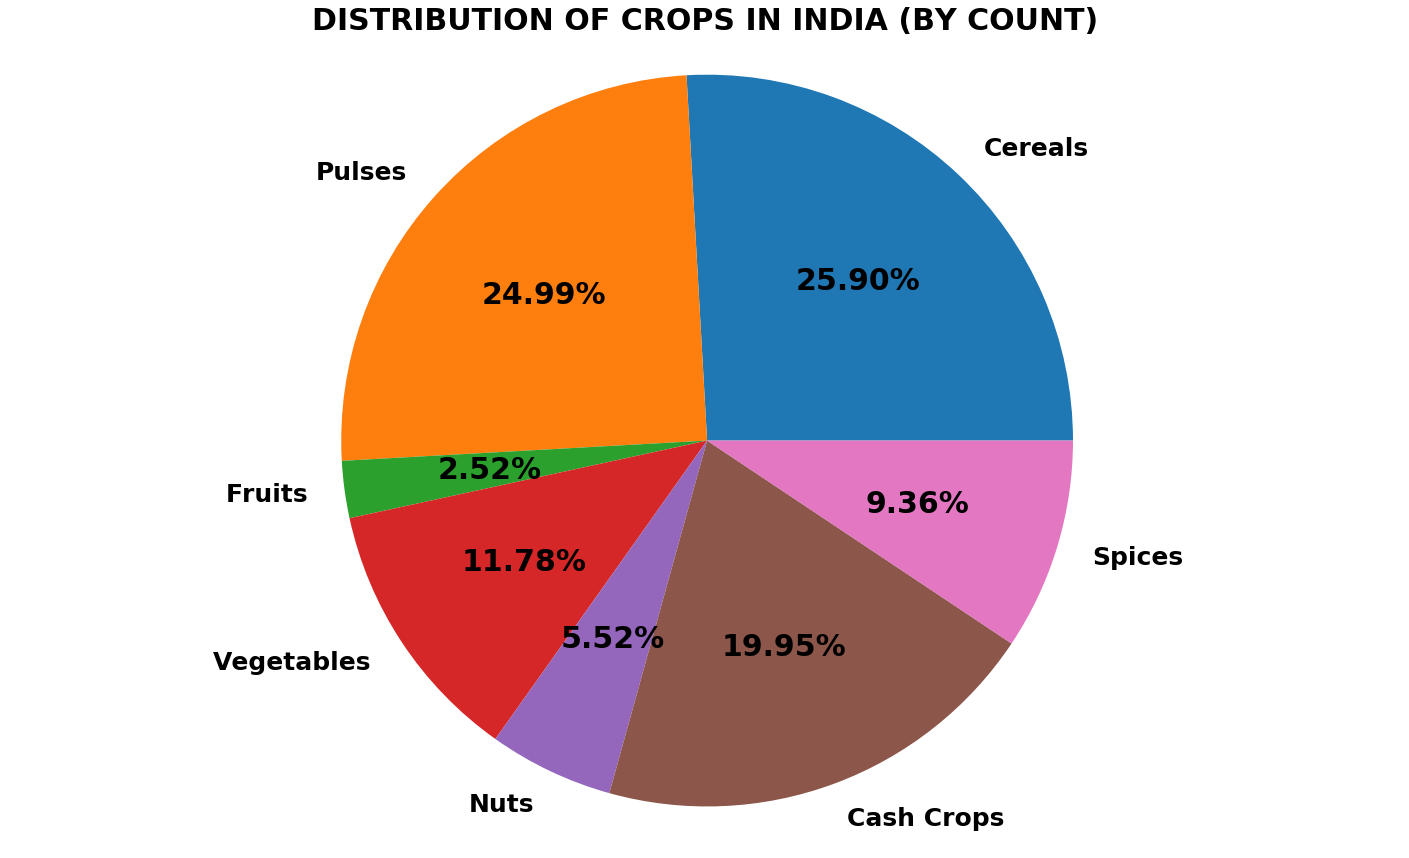

In [76]:
import matplotlib.pyplot as pp
pp.figure(figsize=(25,15))
w,t,at = pp.pie(crop_count,labels=crops,autopct='%.2f%%')
pp.setp(at,size=30,weight='bold')
pp.setp(t,size=25,weight='bold')
pp.axis('equal')
pp.title("DISTRIBUTION OF CROPS IN INDIA (BY COUNT)",size=30,loc='center',weight='bold')
pp.show()

In [15]:
'''While converting the non-numericdata (categorical) to numeric data.....we ought to compare one-hot encoding 
and binary encoding
Fields considered are
1.states
2.districts
3.crop
4.seasons
'''

'While converting the non-numericdata (categorical) to numeric data.....we ought to compare one-hot encoding \nand binary encoding\nFields considered are\n1.states\n2.districts\n3.crop\n4.seasons\n'

In [205]:
#ONE HOT ENCODING

ohe = ce.OneHotEncoder()
d_1 = ohe.fit_transform(data_crops)
d_1.shape

(246091, 812)

In [206]:
#BINARY ENCODING

be = ce.BinaryEncoder()
data = be.fit_transform(data_crops)   #if none columns are specified the method considers all the string attributes by default
data.shape

(246091, 33)

In [207]:
'''reducing the column count from 812 to 33 by using the binary encoding'''


#converting the dataframe to arrays
Y = data.iloc[:,32]
X = data.drop(['Production'],axis = 'columns')
Y = Y.to_frame()
print(type(X))
print(type(Y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Production    3730
dtype: int64
State_Name_0        0
State_Name_1        0
State_Name_2        0
State_Name_3        0
State_Name_4        0
State_Name_5        0
State_Name_6        0
District_Name_0     0
District_Name_1     0
District_Name_2     0
District_Name_3     0
District_Name_4     0
District_Name_5     0
District_Name_6     0
District_Name_7     0
District_Name_8     0
District_Name_9     0
District_Name_10    0
Crop_Year           0
Season_0            0
Season_1            0
Season_2            0
Season_3            0
Crop_0              0
Crop_1              0
Crop_2              0
Crop_3              0
Crop_4              0
Crop_5              0
Crop_6              0
Crop_7              0
Area                0
dtype: int64


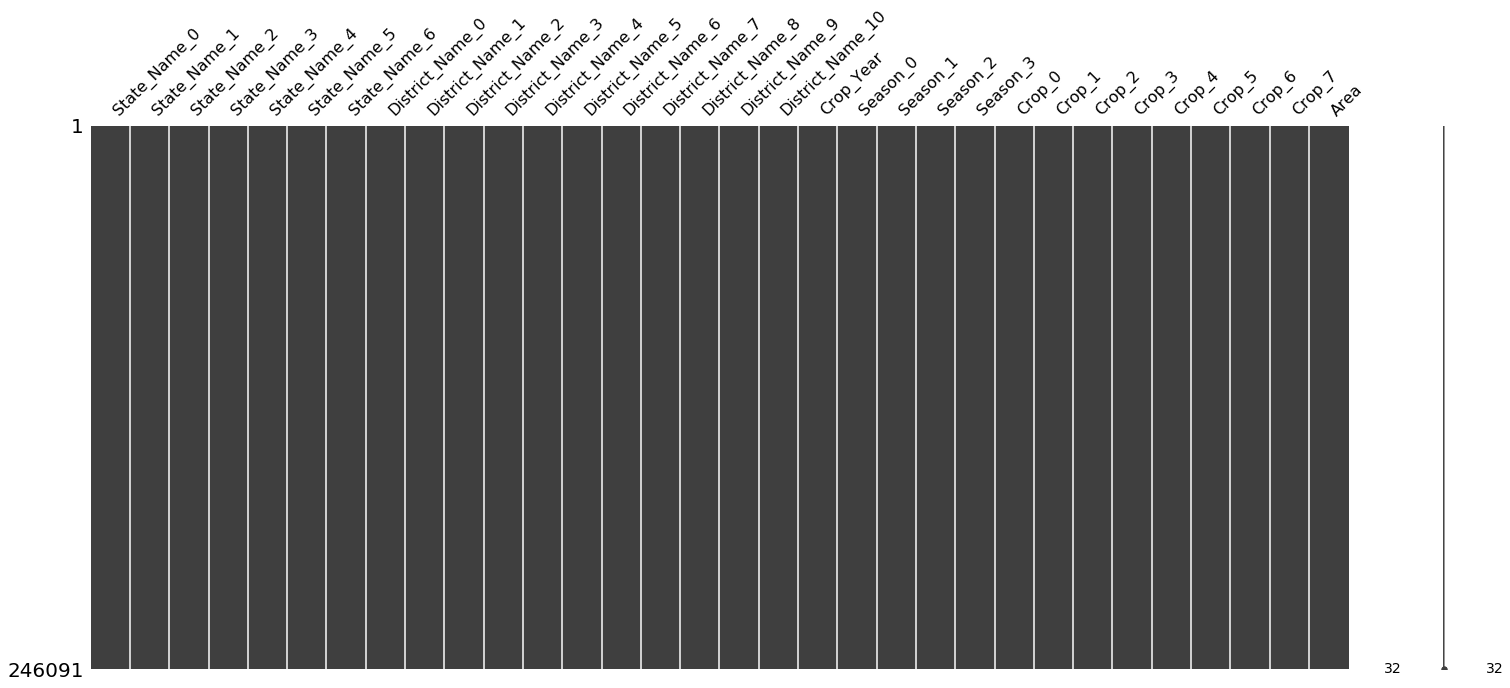

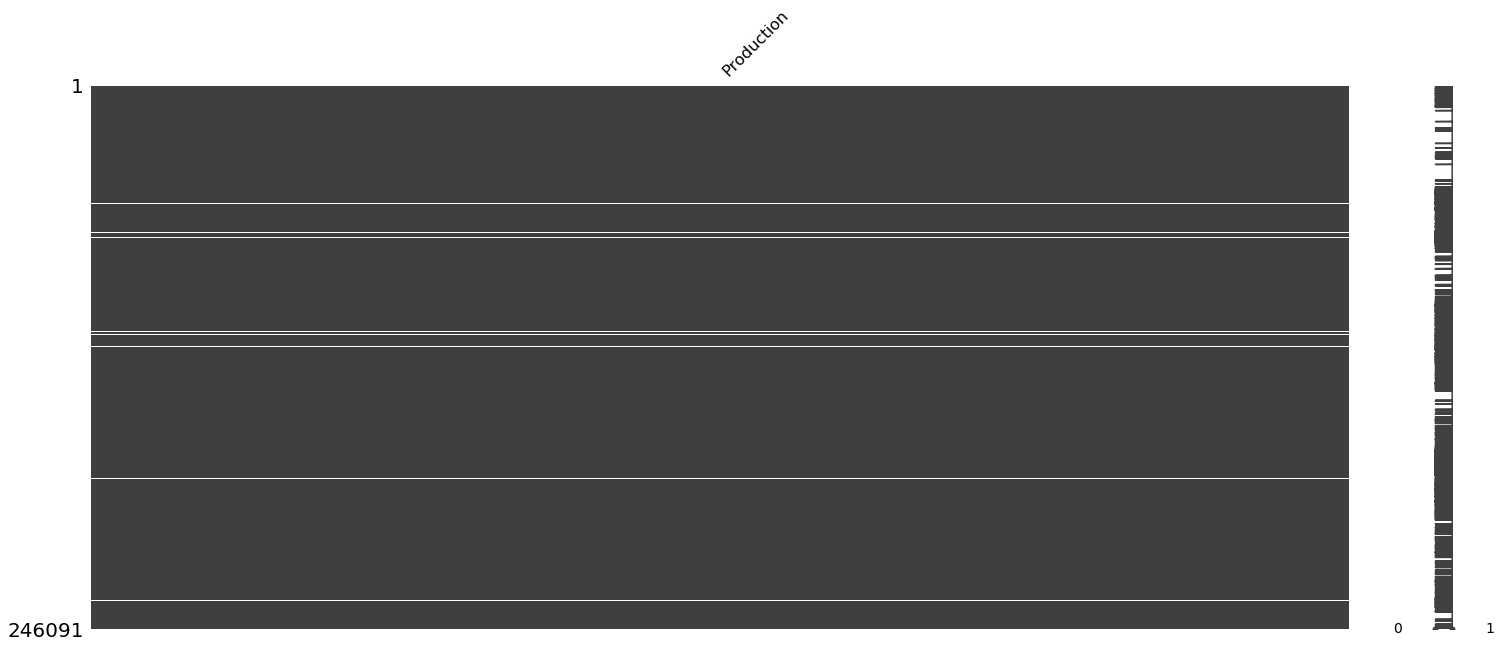

In [208]:
#finding the missing values
import missingno as msno  #visualizing the missing values as a matrix

msno.matrix(X)
msno.matrix(Y)

print(Y.isnull().sum())
print(X.isnull().sum())


In [209]:
'''we have missing values in production(the white lines in the graph)'''

# Replacing the missing values in production with mean of the observations

Y.Production.fillna(Y.Production.mean(),inplace=True)
Y_rep = Y.copy()
print(type(Y_rep))
print(Y_rep)

<class 'pandas.core.frame.DataFrame'>
        Production
0           2000.0
1              1.0
2            321.0
3            641.0
4            165.0
...            ...
246086       801.0
246087       463.0
246088     16250.0
246089    597899.0
246090        88.0

[246091 rows x 1 columns]


In [210]:
#splitting the data into X and Y

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, train_size = 0.8, test_size = 0.2,random_state = 0)

#Y_test_rep = Y_test.copy()  # for reference

'''#normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
Y_train = scaler.fit_transform(Y_train)
Y_test = scaler.fit_transform(Y_test)

print("normalized -> ready for training")
'''


'#normalization\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\n\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.fit_transform(X_test)\nY_train = scaler.fit_transform(Y_train)\nY_test = scaler.fit_transform(Y_test)\n\nprint("normalized -> ready for training")\n'

In [211]:
'''In order to improve the accuracy of the model we will normalize the data attributes Crop_Year and Production 
as they have different range of values

# NORMALIZATION (Z-Score)



X_rep = X.copy()
print(X_rep.shape)
X = scaler.fit_transform(X)
print(X)
Y_rep = Y.copy()
Y = scaler.fit_transform(Y)
print(Y)

temp1 = X.Area.copy()
temp1 = temp1.to_numpy()
temp1 = temp1.reshape(-1,1)
X.Area = scaler.fit_transform(temp1)
print(X.Area)'''



'In order to improve the accuracy of the model we will normalize the data attributes Crop_Year and Production \nas they have different range of values\n\n# NORMALIZATION (Z-Score)\n\n\n\nX_rep = X.copy()\nprint(X_rep.shape)\nX = scaler.fit_transform(X)\nprint(X)\nY_rep = Y.copy()\nY = scaler.fit_transform(Y)\nprint(Y)\n\ntemp1 = X.Area.copy()\ntemp1 = temp1.to_numpy()\ntemp1 = temp1.reshape(-1,1)\nX.Area = scaler.fit_transform(temp1)\nprint(X.Area)'

In [213]:

#Y_train has to be a shape of [n] smaples as a parameter into the regressor method.

Y_train = Y_train.values.ravel()
print(Y_train)
    

[452.3  57.   84.  ...  73.    7.  882. ]


In [214]:
'''from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
Y_rep = Y_rep.values.ravel()
embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100))
embeded_rf_selector.fit(X_rep, Y_rep)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_rep.loc[:,embeded_rf_support].columns.tolist()
print(str(embeded_rf_feature), 'selected features')'''

"from sklearn.feature_selection import SelectFromModel\nfrom sklearn.ensemble import RandomForestClassifier\nY_rep = Y_rep.values.ravel()\nembeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100))\nembeded_rf_selector.fit(X_rep, Y_rep)\n\nembeded_rf_support = embeded_rf_selector.get_support()\nembeded_rf_feature = X_rep.loc[:,embeded_rf_support].columns.tolist()\nprint(str(embeded_rf_feature), 'selected features')"

In [215]:
#defining a random regressor 
#
regressor = RandomForestRegressor(n_estimators = 1000,random_state = 0)
regressor.fit(X_train, Y_train)
print("Model is trained")
print(X_train)
print(Y_train)
    

Model is trained
        State_Name_0  State_Name_1  State_Name_2  State_Name_3  State_Name_4  \
159870             0             0             1             0             1   
16917              0             0             0             0             1   
37429              0             0             0             0             1   
130347             0             0             1             0             0   
51448              0             0             0             0             1   
...              ...           ...           ...           ...           ...   
176963             0             0             1             1             0   
117952             0             0             1             0             0   
173685             0             0             1             1             0   
43567              0             0             0             0             1   
199340             0             0             1             1             1   

        State_Name_5  

In [221]:
#testing
actual_prediction = regressor.predict(X_test)
print("Predicting the crop yield")    
print(type(actual_prediction))
print(type(Y_test))
print(actual_prediction)
print(Y_test)
    
    


Predicting the crop yield
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
[7.21210000e+01 5.15506179e+04 5.09808300e+01 ... 7.98271440e+03
 1.74691834e+04 2.41620000e+02]
        Production
222211        51.0
148500     47581.5
40239        120.0
117          402.0
64394     103000.0
...            ...
48410         48.0
234245       181.0
179097     11325.0
169648        58.0
233866       297.0

[49219 rows x 1 columns]


In [217]:
'''Predicted_Production = scaler.inverse_transform(actual_prediction)
print(Predicted_Production)
Actual_Production = scaler.inverse_transform(Y_test)
print(Y_test_rep)'''

graph_data = pd.DataFrame({'Actual':Y_test.flatten(),'Prediction':actual_prediction.flatten()})
print(graph_data)



[1.37388465e+09 9.81564300e+11 9.71359453e+08 ... 1.51997704e+11
 3.32627415e+11 4.60127677e+09]
        Production
222211        51.0
148500     47581.5
40239        120.0
117          402.0
64394     103000.0
...            ...
48410         48.0
234245       181.0
179097     11325.0
169648        58.0
233866       297.0

[49219 rows x 1 columns]
             Actual    Prediction
0      9.717245e+08  1.373885e+09
1      9.059892e+11  9.815643e+11
2      2.285538e+09  9.713595e+08
3      7.655036e+09  6.063156e+10
4      1.961200e+12  1.462596e+12
...             ...           ...
49214  9.146021e+08  4.345796e+11
49215  3.447025e+09  4.992622e+09
49216  2.156374e+11  1.519977e+11
49217  1.105010e+09  3.326274e+11
49218  5.655755e+09  4.601277e+09

[49219 rows x 2 columns]


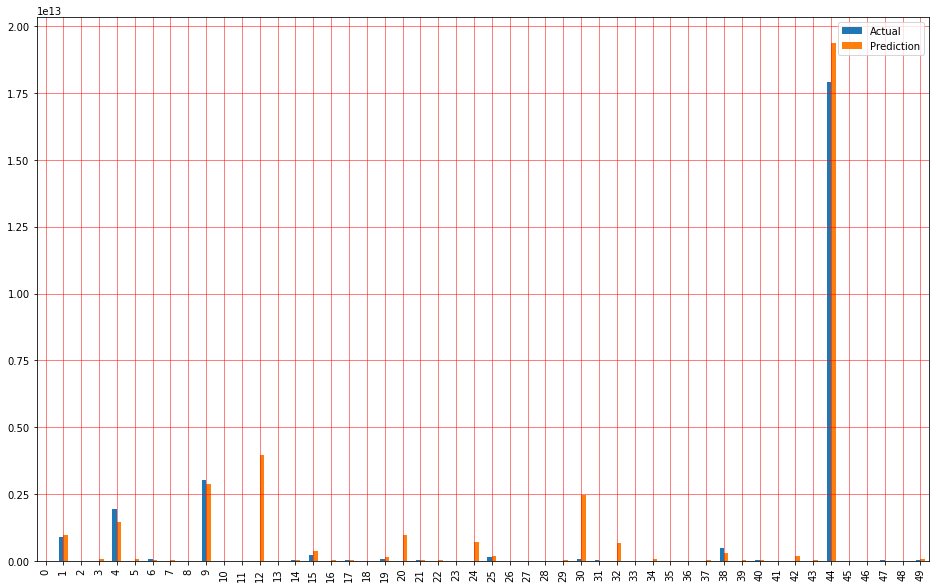

In [218]:
#visualizing the estimated and actual values

import matplotlib.pyplot as plt

graph_data_1 = graph_data.head(50)  #considering first 30 values for graphic visualization
graph_data_1.plot(kind = 'bar',figsize =(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [219]:
#finding the accuracy using RMSE - Root Mean Squared Error

from math import sqrt
temp  = mean_squared_error(Y_test,graph_data.Prediction)
ERROR = sqrt(temp)
print("THE ROOT MEAN SQUARE ERROR IS : ",ERROR)

THE ROOT MEAN SQUARE ERROR IS :  341760301822144.25


In [220]:
print(Y_test_rep.mean())
print(Y_test_rep.std())


Production    645000.430723
dtype: float64
Production    1.904097e+07
dtype: float64
